In [103]:
import warnings
warnings.filterwarnings("ignore")

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
#The link to the csv file for the dataset:
#https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv

In [106]:
full_df=pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [107]:
full_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [108]:
len(full_df)

7043

In [109]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [110]:
#no null values in the dataset

In [111]:
#The columns gender , partner , dependents , phone-service , paperless-billing  and churn have only 2 possible values so we can label encode them

In [112]:
label_encoded_df=full_df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ["gender" , "Partner"  , "Dependents" , "PhoneService" , 'PaperlessBilling' , 'Churn']:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])
label_encoded_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [113]:
#how the encodings took place:
#for gender : female -> 0 , male -> 1
#for partner : no -> 0 , yes -> 1
#for dependents : no -> 0 , yes -> 1
#for Phoneservices : no -> 0 , yes ->1
#for paperlessbilling : no -> 0 , yes -> 1
#for churn : no -> 0 , yes -> 1

In [114]:
#for multiplelines no phone service means no multiple lines so we can convert them to no also
#same for the columns with no internet service as some values , that can be replaced with no or 0

In [115]:
label_encoded_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [116]:
labelled_df = label_encoded_df.copy()

In [117]:
def col_encoder(col_val):
    if col_val == "Yes":
        return 1
    else:
        return 0
col_no_service = ['MultipleLines' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies']
for col in  col_no_service:
    label_encoded_df[col] = label_encoded_df[col].apply(col_encoder)
label_encoded_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [118]:
labelled_df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [119]:
label_encoded_df['MultipleLines'].value_counts()

MultipleLines
0    4072
1    2971
Name: count, dtype: int64

In [120]:
#hence the encoding is correct as col values add up correctly

In [121]:
labelled_df = label_encoded_df.copy()

In [122]:
label_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int32  


In [123]:
label_encoded_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [124]:
total_charges_obj_df = label_encoded_df.copy()

In [125]:
total_charges_obj_df['TotalCharges']=pd.to_numeric(total_charges_obj_df['TotalCharges'] , errors="coerce")

In [126]:
total_charges_obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int32  


In [127]:
blank_total_charges=total_charges_obj_df[total_charges_obj_df['TotalCharges'].isnull()].index
#some of the total charges are blank spaces

In [128]:
full_df.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [129]:
blank_total_charges

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [130]:
#we can drop the 11 rows in 7000 rows it wont affect the predictions much

In [131]:
label_encoded_df=label_encoded_df.drop(blank_total_charges , axis=0)

In [132]:
label_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int32  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int32  
 4   Dependents        7032 non-null   int32  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int32  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int32  
 17  

In [133]:
#now need to convert the totalcharges column to floats

In [134]:
before_floats = label_encoded_df.copy()

In [135]:
before_floats['TotalCharges']=pd.to_numeric(before_floats['TotalCharges'] , errors ='coerce')

In [136]:
before_floats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int32  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int32  
 4   Dependents        7032 non-null   int32  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int32  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int32  
 17  

In [137]:
#works fine so can change the label_encoded_df to before_floats table

In [138]:
label_encoded_df = before_floats.copy()

In [139]:
string_df = label_encoded_df[['InternetService' , 'Contract' , 'PaymentMethod']]

In [140]:
string_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   InternetService  7032 non-null   object
 1   Contract         7032 non-null   object
 2   PaymentMethod    7032 non-null   object
dtypes: object(3)
memory usage: 219.8+ KB


In [141]:
int_df = label_encoded_df.drop(['InternetService' , 'Contract' , 'PaymentMethod'],axis=1)

In [142]:
int_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int32  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int32  
 4   Dependents        7032 non-null   int32  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int32  
 7   MultipleLines     7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  PaperlessBilling  7032 non-null   int32  
 15  MonthlyCharges    7032 non-null   float64
 16  TotalCharges      7032 non-null   float64
 17  

In [143]:
#we need to convert the categorical data but now lets do some EDA on the full_df we had initially

In [144]:
full_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='Churn', ylabel='count'>

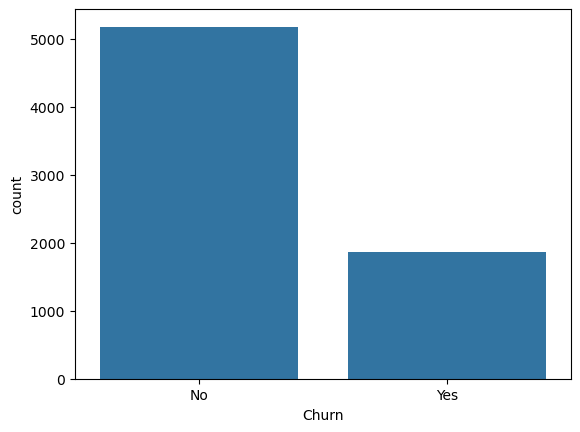

In [145]:
sns.countplot(data=full_df , x='Churn')

In [146]:
full_df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [147]:
#churned customers is about 26%

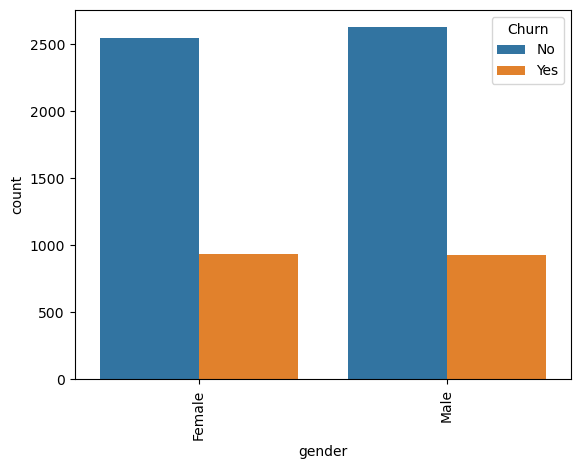

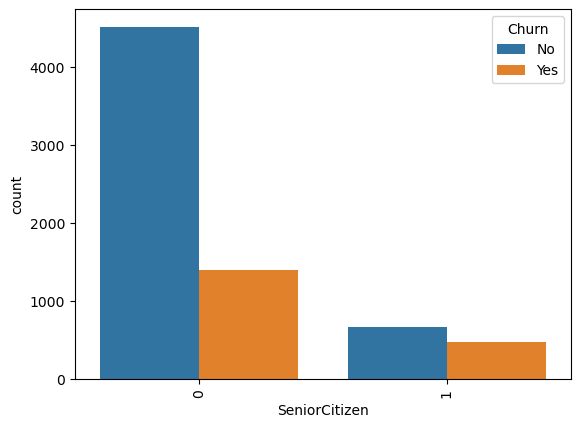

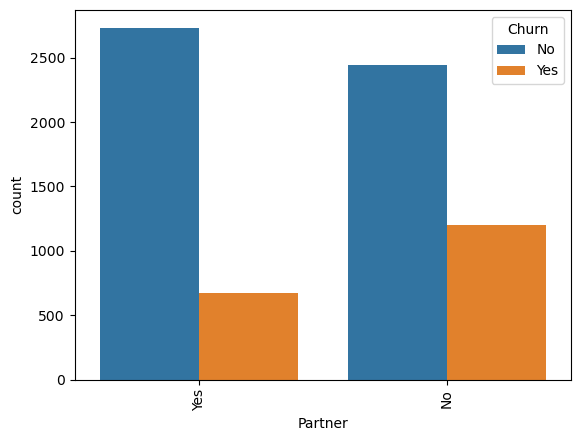

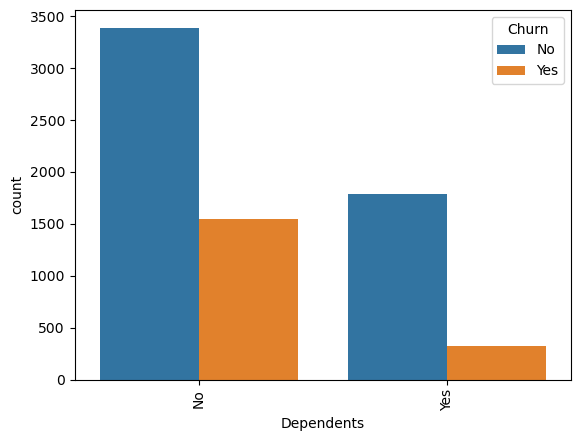

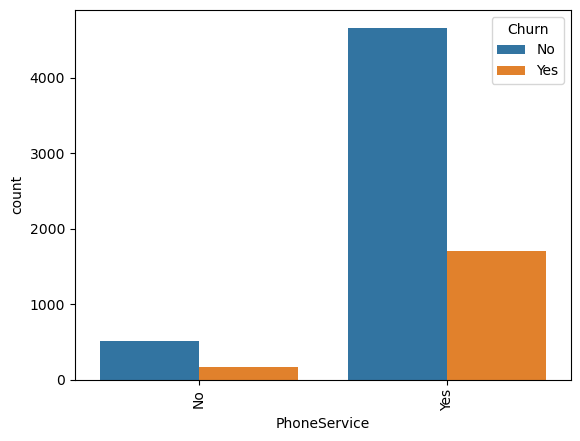

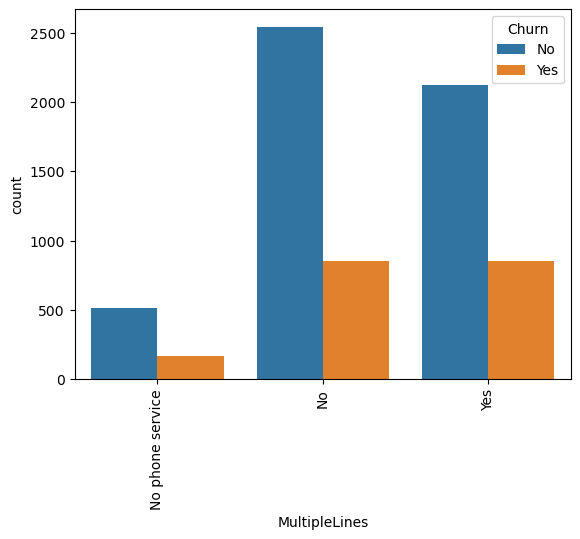

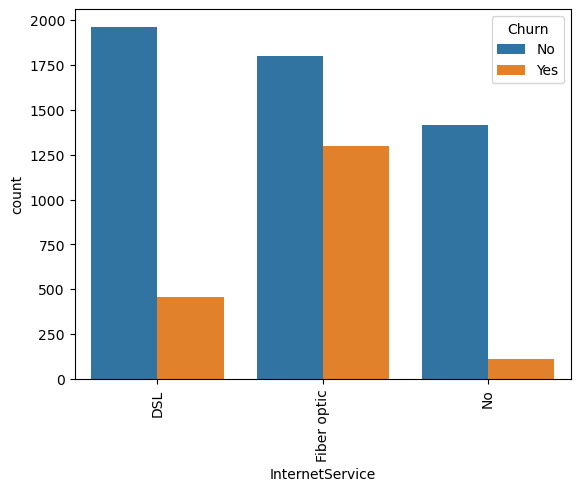

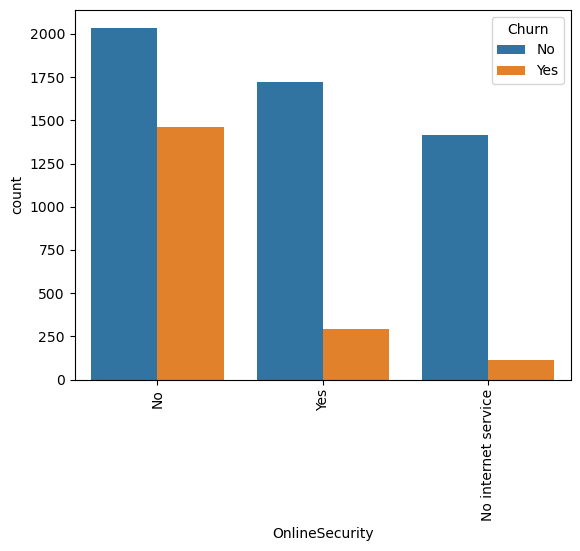

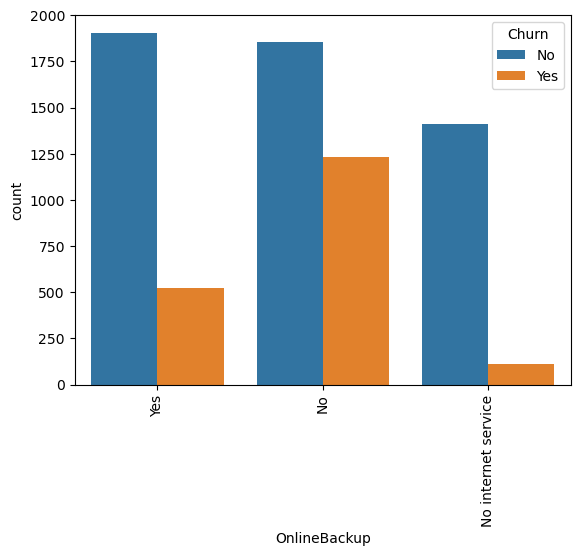

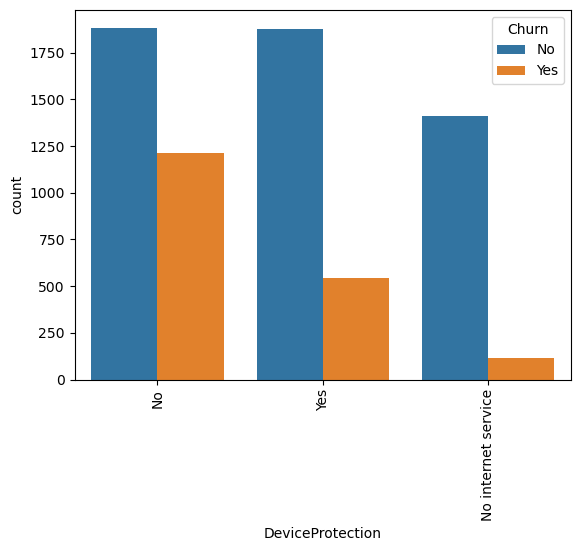

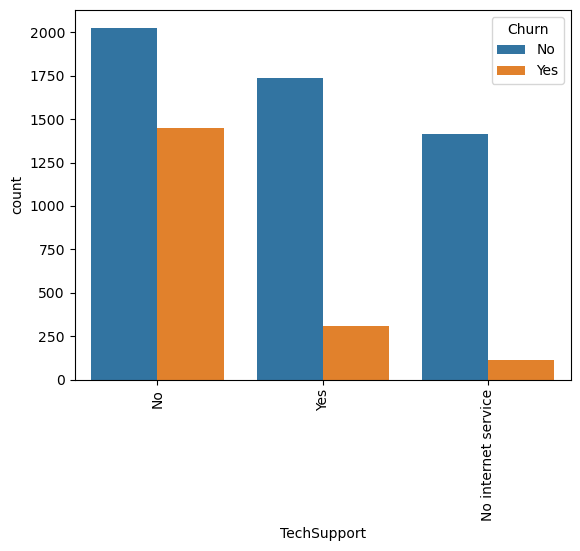

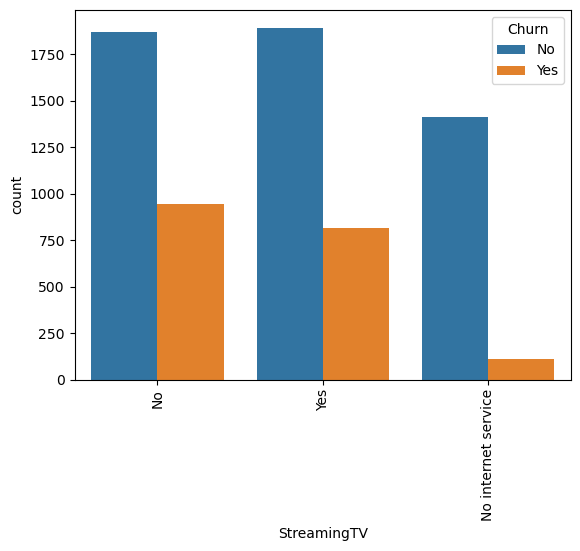

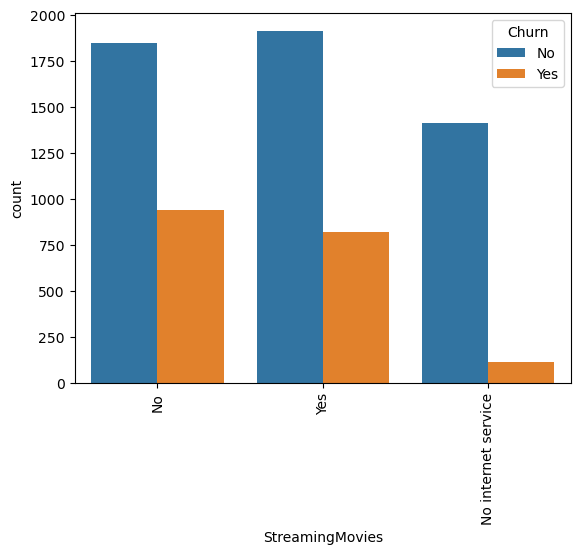

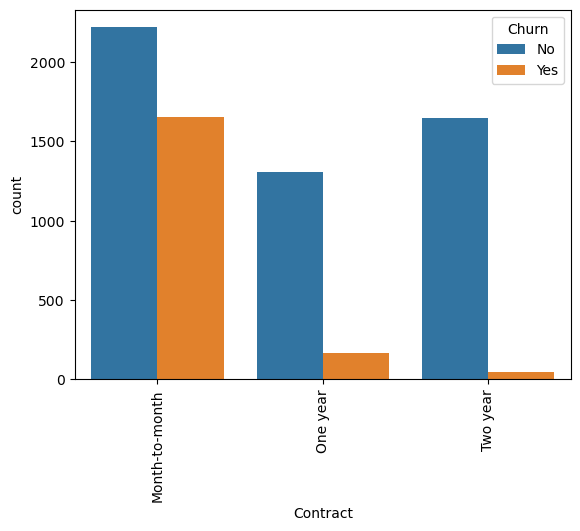

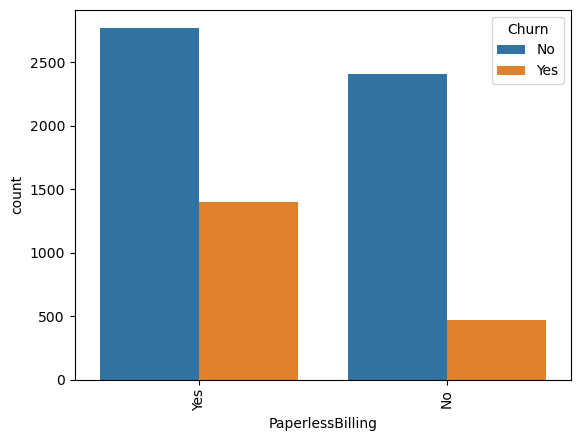

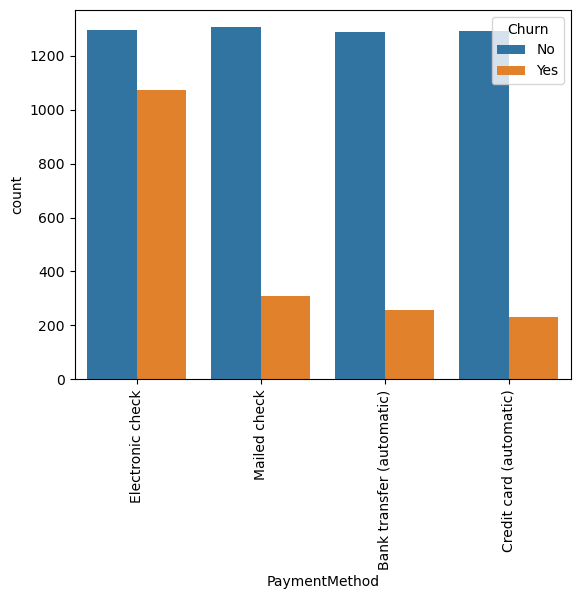

In [148]:
for i , value in enumerate( full_df.drop(['Churn' , 'TotalCharges' , 'MonthlyCharges','customerID' , 'tenure'] , axis=1)):
    plt.figure(i)
    sns.countplot(data=full_df , x = value , hue='Churn')
    plt.xticks(rotation=90)

In [149]:
print(""" 
very high churn rates can be observed in customers with:
fiber optic internet service 
No online security
No online backup
No device protection
No tech support
Month-to-mmonth contract
Electronic check payment method
""")

 
very high churn rates can be observed in customers with:
fiber optic internet service 
No online security
No online backup
No device protection
No tech support
Month-to-mmonth contract
Electronic check payment method



In [150]:
#now lets convert the categorical data to numeric ones

In [151]:
string_df.head()

,InternetService,Contract,PaymentMethod
0,DSL,Month-to-month,Electronic check
1,DSL,One year,Mailed check
2,DSL,Month-to-month,Mailed check
3,DSL,One year,Bank transfer (automatic)
4,Fiber optic,Month-to-month,Electronic check


In [152]:
string_df_dummies = pd.get_dummies(string_df)
string_df_dummies = string_df_dummies.astype(int)
string_df_dummies.head()

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0,0,1,0


In [153]:
final_df =  pd.concat([int_df , string_df_dummies] , axis=1)
final_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [154]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int32  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int32  
 4   Dependents                               7032 non-null   int32  
 5   tenure                                   7032 non-null   int64  
 6   PhoneService                             7032 non-null   int32  
 7   MultipleLines                            7032 non-null   int64  
 8   OnlineSecurity                           7032 non-null   int64  
 9   OnlineBackup                             7032 non-null   int64  
 10  DeviceProtection                         7032 non-nul

In [155]:
#now lets drop the customerID column to make a dataset ready for model for classification

In [156]:
df=final_df.drop('customerID',axis=1)

In [157]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [158]:
df.corr()['Churn']

gender                                    -0.008545
SeniorCitizen                              0.150541
Partner                                   -0.149982
Dependents                                -0.163128
tenure                                    -0.354049
PhoneService                               0.011691
MultipleLines                              0.040033
OnlineSecurity                            -0.171270
OnlineBackup                              -0.082307
DeviceProtection                          -0.066193
TechSupport                               -0.164716
StreamingTV                                0.063254
StreamingMovies                            0.060860
PaperlessBilling                           0.191454
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetServ

In [159]:
#no preprocessing required as all the data is 1 or 0

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X= df.drop('Churn' , axis=1)
y=df['Churn']

In [162]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=42)

In [163]:
#lets train the model on basic knn to see how the metrics are
from sklearn.neighbors import KNeighborsClassifier
basic_knn = KNeighborsClassifier(n_neighbors=5)
basic_knn.fit(X_train , y_train)
preds_basic_knn=basic_knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test , preds_basic_knn))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.59      0.45      0.51       374

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407



In [164]:
#now lets use base linear SVC to check accuracy
from sklearn.svm import LinearSVC
base_svc = LinearSVC(penalty='l2',C=1.5,dual='auto')
base_svc.fit(X_train,y_train)
preds_base_svc = base_svc.predict(X_test)
print(classification_report(y_test , preds_base_svc))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.64      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [165]:
#now lets use the basic random forest classifier as the model and check accuracy
from sklearn.ensemble import RandomForestClassifier
base_forest = RandomForestClassifier(criterion='gini' , bootstrap =True)
base_forest.fit(X_train , y_train)
preds_base_forest = base_forest.predict(X_test)
print(classification_report(preds_base_forest , y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1122
           1       0.47      0.62      0.54       285

    accuracy                           0.78      1407
   macro avg       0.68      0.72      0.70      1407
weighted avg       0.81      0.78      0.79      1407



In [166]:
#now lets use the basic logistic regression as the model and check accuracy
from sklearn.linear_model import LogisticRegression
base_logistic = LogisticRegression(penalty='l2' , C=0.9 , max_iter=5000)
base_logistic.fit(X_train , y_train)
preds_base_logistic = base_logistic.predict(X_test)
print(classification_report(preds_base_logistic , y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1096
           1       0.52      0.62      0.56       311

    accuracy                           0.79      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.80      0.79      0.79      1407



In [167]:
#also for the logistic regression model see the probabilities
#first col -> no churn probability
#second model -> will churn probability
prob_pred_base_logistic = base_logistic.predict_proba(X_test)
prob_pred_base_logistic

array([[0.99462274, 0.00537726],
       [0.87501477, 0.12498523],
       [0.31209842, 0.68790158],
       ...,
       [0.90341787, 0.09658213],
       [0.74616585, 0.25383415],
       [0.99801065, 0.00198935]])

In [168]:
#till now all the models we used gave nearly 80% accuracy
#but as the dataset is unbalanced we need to check other metrics also
#Logistic Regression and RandomForestCLassifier gave maximum precison
#On the other hand KNeighborClassifier and LinearSVC gave maximum recall

In [169]:
#grid search on KNeighborClassifier

# from sklearn.model_selection import GridSearchCV
# cv_knn = KNeighborsClassifier()
# grid_params_knn = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
#                    'weights' : ['uniform' , 'distance'],
#                    'leaf_size' : [10,20,30,40],
#                   }
# model_cv_knn = GridSearchCV(cv_knn , param_grid=grid_params_knn , scoring='f1' , verbose =2 , cv=5)
# model_cv_knn.fit(X_train , y_train)
# model_cv_knn.best_params_

In [170]:
#so lets train the dataset on the best parameters found
grid_knn = KNeighborsClassifier(n_neighbors=5 , leaf_size=10 , weights='uniform')
grid_knn.fit(X_train , y_train)
preds_grid_knn=grid_knn.predict(X_test)
print(classification_report(y_test , preds_grid_knn))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.59      0.45      0.51       374

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407



In [171]:
#training the model for grid search on SVC

# cv_svc = LinearSVC()
# grid_svc_param = {'penalty' : ['l1','l2'],
#                   'loss': ['hinge', 'squared_hinge'],
#                   'dual' : ['auto'],
#                   'C' : [0.5 , 1 , 1.5 , 2 , 2,5],
#                   'max_iter' : [100,500,1000,1500,2000,5000,7000]
#                  }
# model_cv_svc = GridSearchCV(cv_svc , param_grid=grid_svc_param , scoring='f1' , verbose=2 , cv=10)
# model_cv_svc.fit(X_train , y_train)
# model_cv_svc.best_params_

In [172]:
#lets train the svc on the best params
grid_svc = LinearSVC(penalty='l1',C=1.5,dual='auto',loss='squared_hinge',max_iter=7000)
grid_svc.fit(X_train,y_train)
preds_grid_svc = grid_svc.predict(X_test)
print(classification_report(y_test , preds_grid_svc))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.80      0.79      1407



In [173]:
#as we see the SVCs perform the best so lets check on even more parameters

# from sklearn.model_selection import GridSearchCV
# cv_svc = LinearSVC()
# grid_svc_param = {'penalty' : ['l1','l2'],
#                   'loss': ['hinge', 'squared_hinge'],
#                   'dual' : ['auto'],
#                   'C' : [1.5 , 2 , 2,5, 3],
#                   'max_iter' : [5000,7000,8000]
#                  }
# model_cv_svc = GridSearchCV(cv_svc , param_grid=grid_svc_param , scoring='f1' , verbose=2 , cv=10)
# model_cv_svc.fit(X_train , y_train)
# model_cv_svc.best_params_

In [174]:
grid_svc_new = LinearSVC(penalty='l1',C=5,dual='auto',loss='squared_hinge',max_iter=5000)
grid_svc_new.fit(X_train,y_train)
preds_grid_svc_new = grid_svc_new.predict(X_test)
print(classification_report(y_test , preds_grid_svc_new))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407



In [175]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , preds_grid_svc_new)

array([[928, 105],
       [184, 190]], dtype=int64)

In [176]:
#this shows unbalance in the predictions as most predictions are True Positive and rest are 10% of it.

In [177]:
from sklearn.ensemble import RandomForestClassifier
base_forest_new = RandomForestClassifier(criterion='gini' , bootstrap =True , n_estimators=1000)
base_forest_new.fit(X_train , y_train)
preds_base_forest_new = base_forest_new.predict(X_test)
print(classification_report(preds_base_forest_new , y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1115
           1       0.49      0.62      0.55       292

    accuracy                           0.79      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.81      0.79      0.79      1407



In [178]:
#lets try with adaboosting the decision trees
from sklearn.ensemble import AdaBoostClassifier
ada_rfc = AdaBoostClassifier(n_estimators = 66 , learning_rate = 0.5)
ada_rfc.fit(X_train , y_train)
preds_ada = ada_rfc.predict(X_test)
print(classification_report(preds_ada , y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1111
           1       0.49      0.62      0.55       296

    accuracy                           0.79      1407
   macro avg       0.69      0.73      0.71      1407
weighted avg       0.81      0.79      0.80      1407



In [179]:
#as there is unbalance and none of the previous models could achieve 90% accuracy lets use SMOTE

In [180]:
#using SMOTE to oversample the minority data
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)
resampled_X_train , resampled_X_test , resampled_y_train , resampled_y_test = train_test_split(X_resampled , y_resampled , test_size=0.2 , random_state=42)

In [181]:
from sklearn.tree import DecisionTreeClassifier
model_smote = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_smote.fit(resampled_X_train,resampled_y_train)
smote_predict = model_smote.predict(resampled_X_test)
print(classification_report(resampled_y_test, smote_predict))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       546
           1       0.96      0.93      0.95       626

    accuracy                           0.94      1172
   macro avg       0.94      0.94      0.94      1172
weighted avg       0.94      0.94      0.94      1172



In [182]:
#now lets grid search on Decision tree and try to get better metrics

# from sklearn.model_selection import GridSearchCV
# tree_sm = DecisionTreeClassifier()
# smote_param_grid = {'criterion' : ['gini' , 'log_loss'] , 
#                     'max_depth' : [3,4,5,6] ,
#                     'min_samples_leaf' : [3,4,5,6] ,
#                     'min_samples_split' : [2,3,4,5,6]}
# model_tree_smote = GridSearchCV(tree_sm , param_grid= smote_param_grid , scoring ='f1' , verbose = 2 , cv = 10)
# model_tree_smote.fit(resampled_X_train,resampled_y_train)
# model_tree_smote.best_params_

In [183]:
grid_smote_tree = DecisionTreeClassifier(criterion = 'log_loss' , max_depth = 6 , min_samples_leaf=3 , min_samples_split=5 , random_state=100)
grid_smote_tree.fit(resampled_X_train,resampled_y_train)
grid_smote_preds = grid_smote_tree.predict(resampled_X_test)
print(classification_report(resampled_y_test , grid_smote_preds)) 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       546
           1       0.94      0.96      0.95       626

    accuracy                           0.94      1172
   macro avg       0.95      0.94      0.94      1172
weighted avg       0.94      0.94      0.94      1172



In [184]:
#hence the average accuracy achieved is 93 percent 

In [185]:
confusion_matrix( resampled_y_test , grid_smote_preds)

array([[507,  39],
       [ 26, 600]], dtype=int64)

In [186]:
#lets use different models to improve the metrics now

In [187]:
from sklearn.ensemble import RandomForestClassifier
smote_rfc = RandomForestClassifier(n_estimators = 10 , max_depth = 5 , min_samples_leaf=5 , min_samples_split=3 , criterion = 'gini' , verbose =2)
smote_rfc.fit(resampled_X_train,resampled_y_train)
smote_rfc_preds = smote_rfc.predict(resampled_X_test)
print(classification_report(resampled_y_test , smote_rfc_preds))

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       546
           1       0.93      0.94      0.94       626

    accuracy                           0.93      1172
   macro avg       0.93      0.93      0.93      1172
weighted avg       0.93      0.93      0.93      1172



In [188]:
confusion_matrix(resampled_y_test , smote_rfc_preds)

array([[499,  47],
       [ 35, 591]], dtype=int64)

In [189]:
#now lets use grid search for better metrics


# from sklearn.ensemble import RandomForestClassifier
# grid_smote_rfc = RandomForestClassifier()
# smote_rfc_params = {'n_estimators' : [5,10,15,20,25] ,
#                     'max_depth' : [4,5,6,7] ,
#                     'min_samples_leaf' : [3,4,5,6] , 
#                     'criterion' : ['gini' , 'log_loss'],
#                     'min_samples_split' : [2,3,4]}
# from sklearn.model_selection import GridSearchCV
# smote_rfc_model = GridSearchCV(grid_smote_rfc , param_grid=smote_rfc_params , scoring = 'f1' , verbose = 2, cv = 10)
# smote_rfc_model.fit(resampled_X_train,resampled_y_train)
# smote_rfc_model.best_params_

In [190]:
from sklearn.ensemble import RandomForestClassifier
rfc_final_smote = RandomForestClassifier(criterion = 'gini' , max_depth = 7 , min_samples_leaf = 5 , min_samples_split = 4 , n_estimators = 25)
rfc_final_smote.fit(resampled_X_train,resampled_y_train)
rfc_grid_smote_pred = rfc_final_smote.predict(resampled_X_test)
print(classification_report(rfc_grid_smote_pred , resampled_y_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       527
           1       0.96      0.93      0.95       645

    accuracy                           0.94      1172
   macro avg       0.94      0.95      0.94      1172
weighted avg       0.95      0.94      0.94      1172



In [191]:
#we are getting similar accuracy and other meterics

In [192]:
#lets use LinearSVC

# from sklearn.svm import LinearSVC
# from sklearn.model_selection import GridSearchCV
# smote_grid_svc = LinearSVC()
# grid_smote_svc_param = {'penalty' : ['l1','l2'],
#                   'loss': ['hinge', 'squared_hinge'],
#                   'dual' : ['auto'],
#                   'C' : [0.5 , 1 , 1.5 , 2 , 2,5],
#                   'max_iter' : [3000 , 5000 , 7000]
#                  }
# smote_svc_grid = GridSearchCV(smote_grid_svc , param_grid=grid_smote_svc_param , cv = 10 , scoring = 'f1' , verbose=2)
# smote_svc_grid.fit(resampled_X_train,resampled_y_train)
# smote_svc_grid.best_params_

In [195]:
smote_grid_svc_final = LinearSVC(penalty='l1',C=2,dual='auto',loss='squared_hinge',max_iter=7000)
smote_grid_svc_final.fit(resampled_X_train,resampled_y_train)
smote_preds_grid_svc_final = smote_grid_svc_final.predict(resampled_X_test)
print(classification_report(resampled_y_test , smote_preds_grid_svc_final))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       546
           1       0.96      0.95      0.96       626

    accuracy                           0.95      1172
   macro avg       0.95      0.95      0.95      1172
weighted avg       0.95      0.95      0.95      1172



In [194]:
#again similar results so stopping to test more ml models